### Prerequisitos

Instalación de las librerias base para la ejecucion de Modelo

* opencv-python
* imgaug
* keras-segmentation

In [3]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python
#!pip install albumentations
#!pip install imgaug==0.2.7
#!pip install keras-segmentation
!pip install keras-segmentation==0.3.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
libxrender-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     |████████████████████████████████| 3.3MB 3.7MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=edcb00c292a570d178507c11672f5fcd405b4ec864ac9171e678d79176883774
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found 

### Ejemplo de Implementación (Red Pre-Entrenado)

Para este ejemplo se utilizará la red pre-entrenada [PSPNet](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html]), usando como dataset [Pascal VOC 2012](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/).

In [4]:
# Ejemplo tomado de: https://github.com/divamgupta/image-segmentation-keras#pre-trained-models
from keras_segmentation.pretrained import pspnet_101_voc12

model = pspnet_101_voc12()

model.summary()


Using TensorFlow backend.


264151040/264149344 [==============================] - 22s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 473, 473, 3)  0                                            
__________________________________________________________________________________________________
conv1_1_3x3_s2 (Conv2D)         (None, 237, 237, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1_3x3_s2_bn (BatchNormali (None, 237, 237, 64) 256         conv1_1_3x3_s2[0][0]             
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 237, 237, 64) 0           conv1_1_3x3_s2_bn[0][0]          
________________________

In [6]:
# Ejecutamos el modelo
out = model.predict_segmentation(
    inp="moto_gp_01.jpg",
    out_fname="out.png"
)

A continuación se muestra la imágen original y la imágen segmentada.

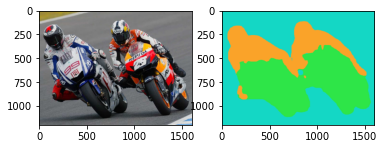

In [7]:
# Tomado de Clase
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img1 = cv2.imread(r"moto_gp_01.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(r"out.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img1)
f.add_subplot(1,2, 2)
plt.imshow(img2)
plt.show(block=True)

### Entrenamiento de la Red Neuronal (vgg_unet)

* Se utilizara el [dataset1](https://drive.google.com/file/d/0B0d9ZiqAgFkiOHR1NTJhWVJMNEU/view?usp=sharing) que tiene imagenes etiquetadas
* El codigo de entrenamiento se ha tomado de [A Beginner's guide to Deep Learning based Semantic Segmentation using Keras](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html)

In [9]:
#Descomprimimos el Dataset
!unzip dataset1.zip

Archive:  dataset1.zip
   creating: dataset1/
   creating: dataset1/annotations_prepped_test/
 extracting: dataset1/annotations_prepped_test/0016E5_08085.png  
 extracting: dataset1/annotations_prepped_test/0016E5_08039.png  
 extracting: dataset1/annotations_prepped_test/0016E5_07995.png  
 extracting: dataset1/annotations_prepped_test/0016E5_08067.png  
 extracting: dataset1/annotations_prepped_test/0016E5_08073.png  
  inflating: dataset1/annotations_prepped_test/0016E5_08123.png  
  inflating: dataset1/annotations_prepped_test/0016E5_08159.png  
  inflating: dataset1/annotations_prepped_test/0016E5_08157.png  
 extracting: dataset1/annotations_prepped_test/0016E5_08047.png  
 extracting: dataset1/annotations_prepped_test/0016E5_08075.png  
  inflating: dataset1/annotations_prepped_test/0016E5_08121.png  
 extracting: dataset1/annotations_prepped_test/0016E5_08053.png  
  inflating: dataset1/annotations_prepped_test/0016E5_08119.png  
  inflating: dataset1/annotations_prepped_test/0

In [20]:
# Ejecutamos el entrenamient del modelo
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=51 ,  input_height=416, input_width=608  )

model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , 
    epochs=10,
    optimizer_name='adagrad' # adagrad, adadelta
)


  4%|▍         | 16/367 [00:00<00:02, 156.90it/s]

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 155.18it/s]


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 319s 622ms/step - loss: 0.9739 - accuracy: 0.7215
saved  /tmp/vgg_unet_1.0
Epoch 2/10
512/512 [==============================] - 313s 612ms/step - loss: 0.6208 - accuracy: 0.8050
saved  /tmp/vgg_unet_1.1
Epoch 3/10
512/512 [==============================] - 313s 612ms/step - loss: 0.5100 - accuracy: 0.8402
saved  /tmp/vgg_unet_1.2
Epoch 4/10
512/512 [==============================] - 317s 618ms/step - loss: 0.4284 - accuracy: 0.8668
saved  /tmp/vgg_unet_1.3
Epoch 5/10
512/512 [==============================] - 317s 619ms/step - loss: 0.3783 - accuracy: 0.8823
saved  /tmp/vgg_unet_1.4
Epoch 6/10
512/512 [==============================] - 317s 619ms/step - loss: 0.3423 - accuracy: 0.8929
saved  /tmp/vgg_unet_1.5
Epoch 7/10
512/512 [==============================] - 317s 620ms/step - loss: 0.3116 - accuracy: 0.9022
saved  /tmp/vgg_unet_1.6
Epoch 8/10
512/512 [==============================] - 317s 620ms/step - loss: 

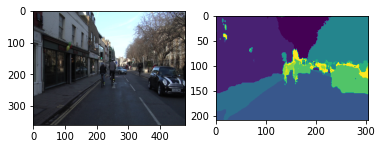

In [22]:
# Probamos el modelo con una imagen
import matplotlib.pyplot as plt
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)
#Tomado de clase
img2 = cv2.imread(r"dataset1/images_prepped_test/0016E5_07965.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#plt.imshow(out)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img2)
f.add_subplot(1,2, 2)
plt.imshow(out)
plt.show(block=True)

In [23]:
# Evaluamos el modelo
print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

101it [00:24,  4.07it/s]

{'frequency_weighted_IU': 0.7946915989375635, 'mean_IU': 0.11518039149186099, 'class_wise_IU': array([0.93731201, 0.75917218, 0.04011333, 0.94830258, 0.78866234,
       0.84890625, 0.22228264, 0.43853107, 0.36304274, 0.21209321,
       0.17599903, 0.13978257, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}
